In [32]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
with open('/Users/suyeon/Desktop/github/vib-thermal/play_signal/collected_data_1744100383.json', 'r', encoding='utf-8') as f:
    data = json.load(f)



In [34]:
data.keys()

dict_keys(['vib_signal', 'vib_amp', 'vib_freq', 'thr_amp', 'sample_rate', 'duration', 'timestamp', 'user_id'])

In [35]:
data['vib_amp']

[0,
 0.028750000000000053,
 0.11875000000000002,
 0.15624999062500236,
 0.1937499812500047,
 0.23124997187500707,
 0.26875000000000004,
 0.32875,
 0.3587499900000033,
 0.3887499800000066,
 0.41874999999999996,
 0.438749990000005,
 0.45875,
 0.47474999680000063,
 0.4907499936000013,
 0.5067499904000019,
 0.5227499872000027,
 0.5387500000000001,
 0.5537499925000038,
 0.56875,
 0.5837499962500009,
 0.5987499925000018,
 0.6137499887500028,
 0.6287499999999999,
 0.6420833288888903,
 0.6554166577777807,
 0.66875,
 0.6820833311111114,
 0.695416662222223,
 0.7087499933333344,
 0.7220833244444459,
 0.7354166555555575,
 0.74875,
 0.7620833288888904,
 0.7754166577777808,
 0.7887500000000001,
 0.7987499983333337,
 0.8087499966666672,
 0.8187499950000009,
 0.8287499933333344,
 0.8387499916666681,
 0.84875,
 0.8554166644444452,
 0.8620833288888904,
 0.86875,
 0.8747499988000003,
 0.8807499976000005,
 0.8867499964000007,
 0.8927499952000009,
 0.8987499999999999,
 0.8987499999999999,
 0.89874999999999

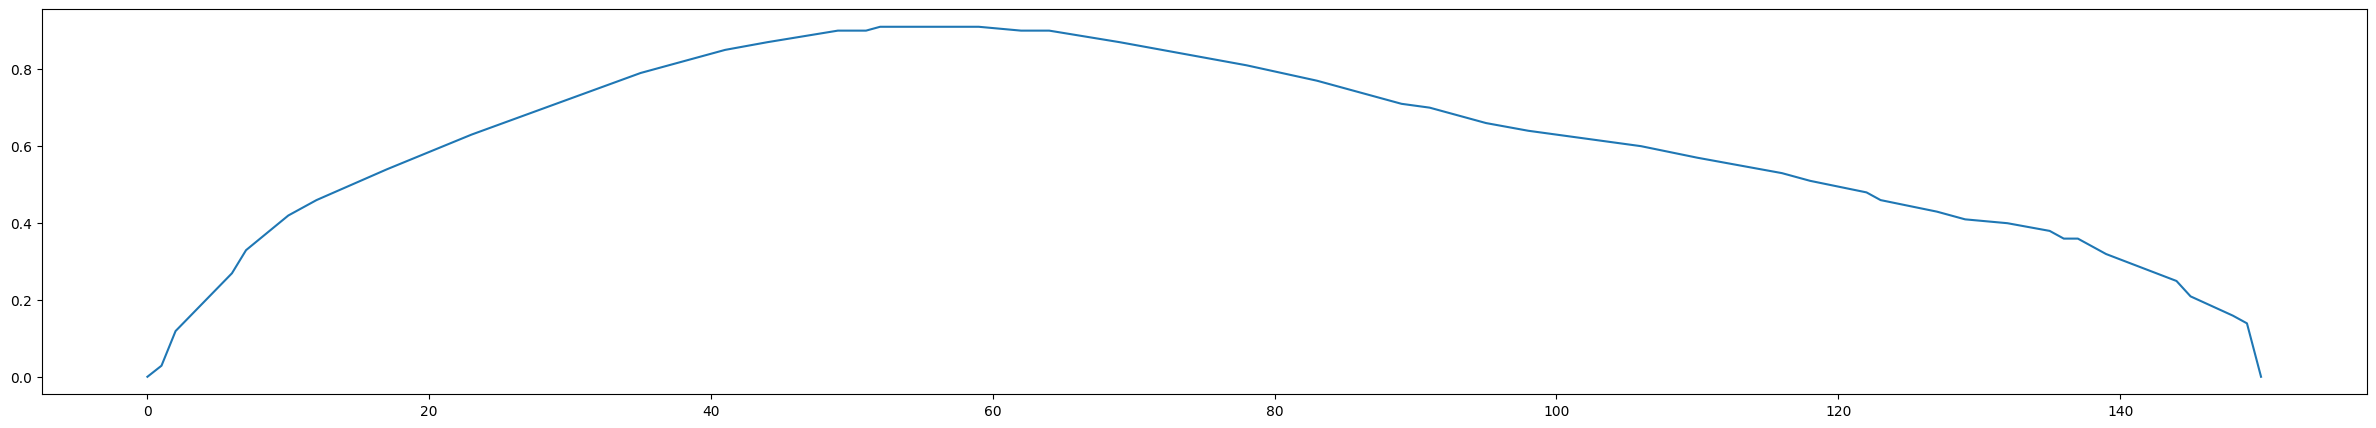

In [36]:
wave = data['vib_amp']
plt.figure(figsize=(30, 5))  # 가로 10, 세로 5인 크기 설정
plt.plot(wave)
plt.show()

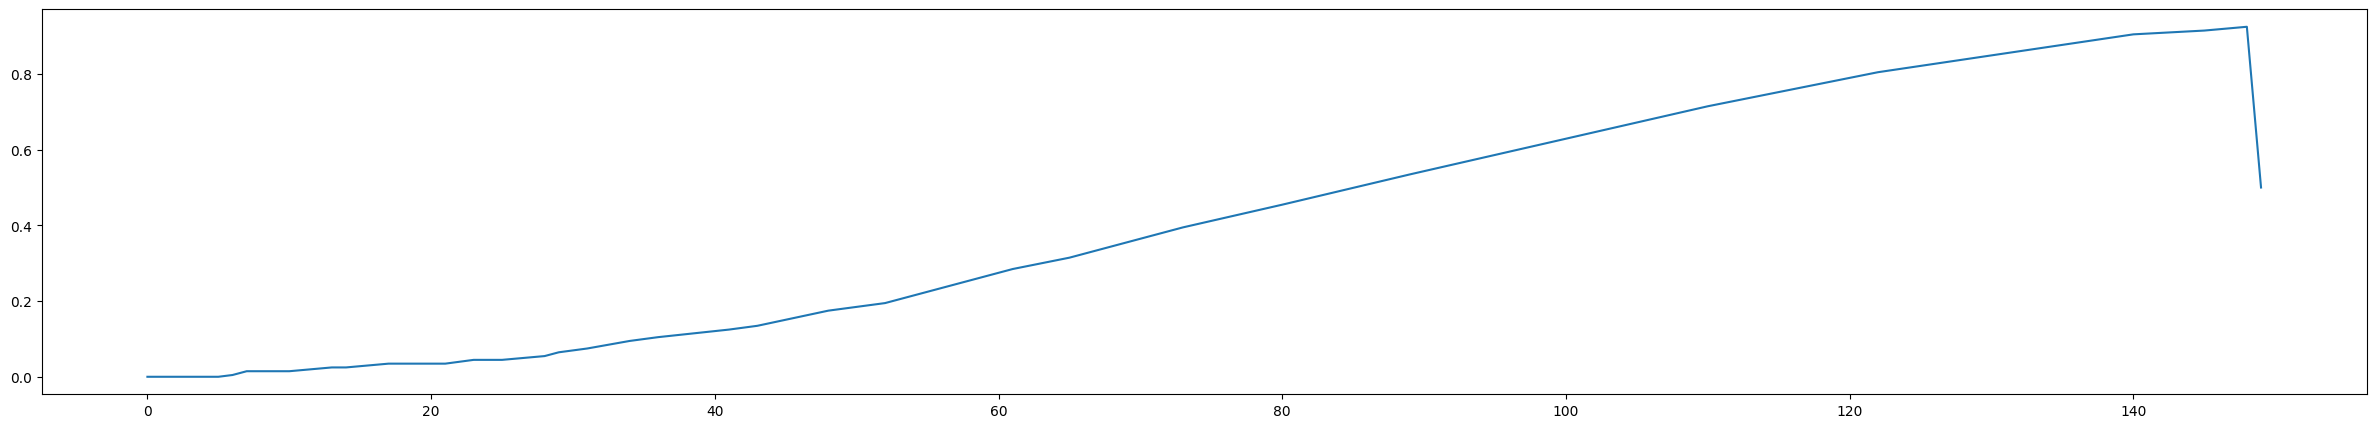

In [37]:
freq = data['vib_freq']
plt.figure(figsize=(30, 5))  
plt.plot(freq)
plt.show()

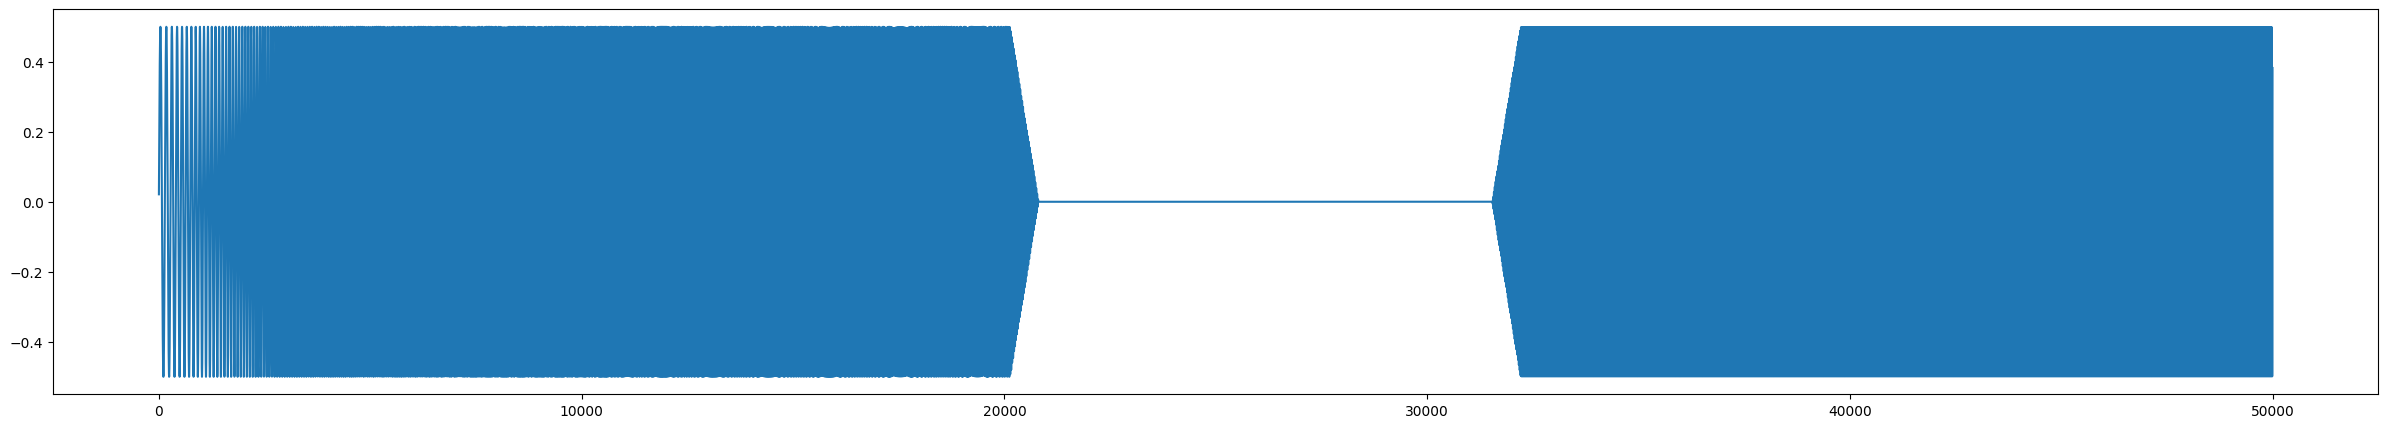

In [31]:
wave = data['vib_signal']
plt.figure(figsize=(30, 5))  
plt.plot(wave)
plt.show()

In [36]:
# write as wav file
wave = np.array(wave, dtype=np.float32)
import scipy.io.wavfile
scipy.io.wavfile.write('vib_signal.wav', 8000, wave)

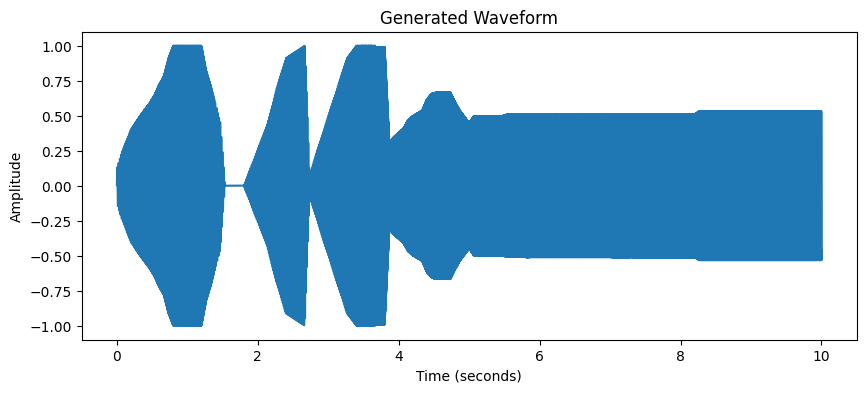

c:\Users\sy921\anaconda3\envs\sy\lib\site-packages\matplotlib\axes\_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Text(0, 0.5, 'Frequency (Hz)')

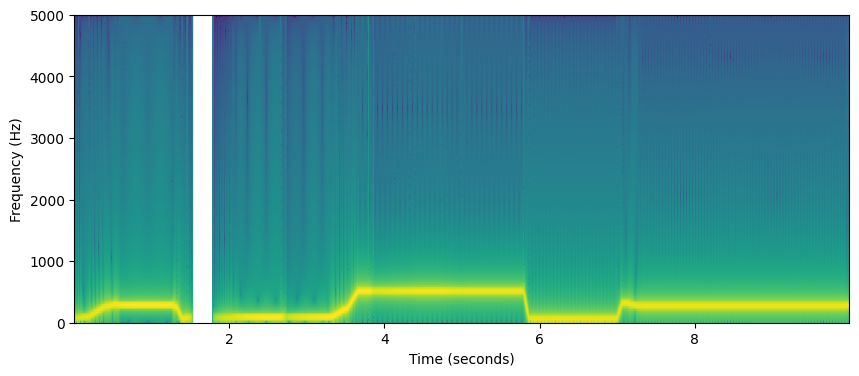

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# JSON 데이터에서 진동 신호를 가져온다고 가정
vib_signal = np.array(data["vib_signal"])  # 저장된 신호
sample_rate = data["sample_rate"]  # 샘플링 속도
duration = len(vib_signal) / sample_rate  # 신호의 지속 시간

# 시간 축 설정
time = np.linspace(0, duration, len(vib_signal))

# 플로팅
plt.figure(figsize=(10, 4))
plt.plot(time, vib_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Generated Waveform")
plt.show()

# plot the spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(vib_signal, Fs=sample_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")


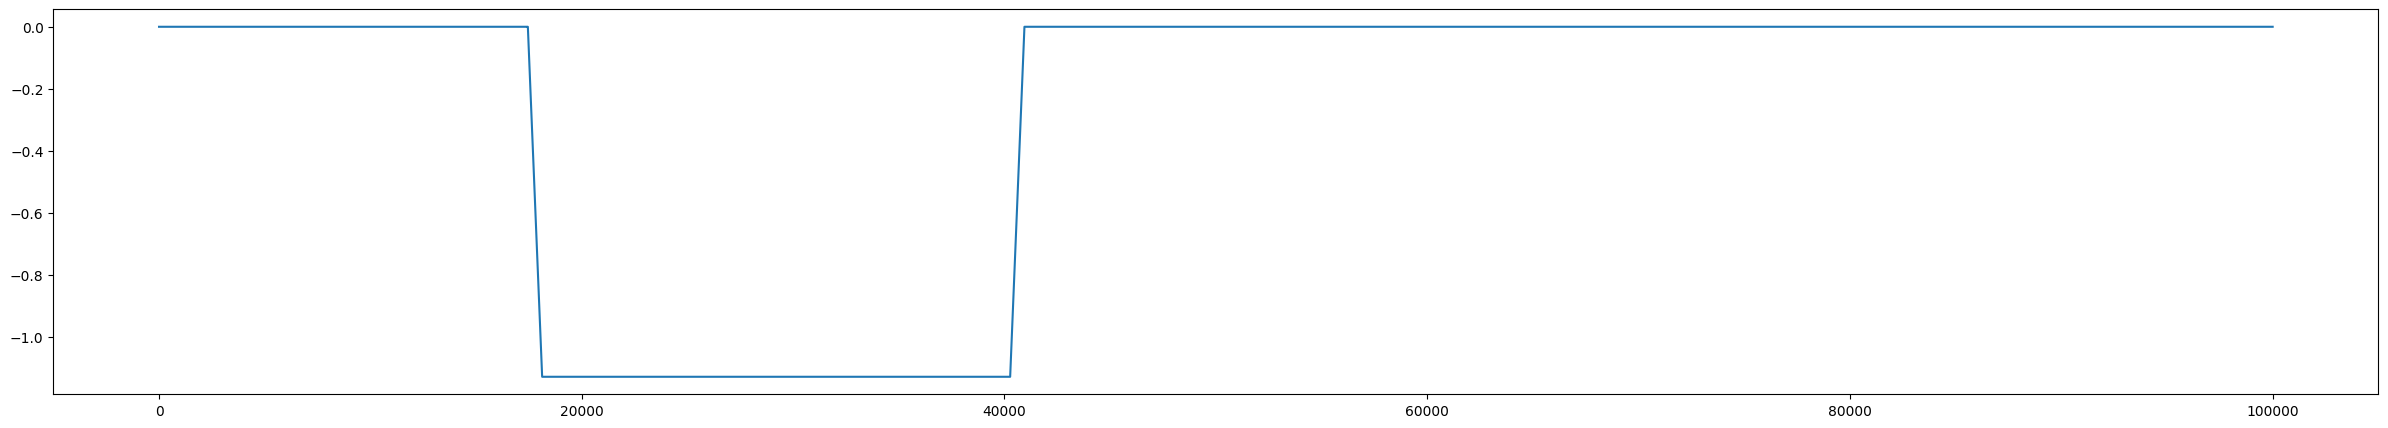

In [38]:
thermal = data['thermal_signal']
plt.figure(figsize=(30, 5))
plt.plot(thermal)
plt.show()

## Wave form Function(amplitude + frequency = Wave form )

In [39]:
import numpy as np

SAMPLE_RATE = 10000
MIN_FREQ = 50
MAX_FREQ = 500
TOTAL_DURATION_SEC =10

def map_frequency(value, min_value, max_value):
    return MIN_FREQ + (MAX_FREQ - MIN_FREQ) * ((value - min_value) / (max_value - min_value))

def linterp_index(arr, perc):
    index = perc * (len(arr) - 1)
    lower = int(np.floor(index))
    upper = int(np.ceil(index))
    weight = index - lower
    value = arr[lower] * (1 - weight) + arr[upper] * weight
    return value

def generate_signal(vib_amp, vib_freq, duration=None):
    if duration is None:
        duration = TOTAL_DURATION_SEC

    active_perc = duration / TOTAL_DURATION_SEC
    num_output_samples = int(duration * SAMPLE_RATE)
    vib_signal = np.zeros(num_output_samples, dtype=np.float32)

    phase_acc = 0
    for i in range(num_output_samples):
        perc = i / num_output_samples
        lperc = perc * active_perc

        s_freq = linterp_index(vib_freq, lperc)
        s_amp = linterp_index(vib_amp, lperc)

        current_freq = map_frequency(s_freq, 0, 1)
        phase_delta = 2 * np.pi * current_freq / SAMPLE_RATE

        phase_acc += phase_delta
        vib_signal[i] = s_amp * np.sin(phase_acc)

    return vib_signal, duration


In [40]:
# POST로 전달받은 데이터
vib_signal = data['vib_signal']  # 웹에서 생성된 waveform
vib_amp = data['vib_amp']        # draw canvas의 진폭 (0~1)
vib_freq = data['vib_freq']      # draw canvas의 주파수 (0~1)
thr_amp = data['thermal_signal'] # 이미 -6~6으로 정규화된 thermal signal

# 샘플 수 확인
print(f"vib_signal: {len(vib_signal)} samples")
print(f"vib_amp: {len(vib_amp)} control points")
print(f"vib_freq: {len(vib_freq)} control points")
print(f"thr_amp: {len(thr_amp)} samples")

# 샘플 출력 (앞 10개만)
print("\n📈 vib_signal (first 10):")
print(np.array(vib_signal[:10]))

print("\n🟢 vib_amp (first 10):")
print(np.array(vib_amp[:10]))

print("\n🔵 vib_freq (first 10):")
print(np.array(vib_freq[:10]))

print("\n🔥 thr_amp (first 10):")
print(np.array(thr_amp[:10]))


vib_signal: 100000 samples
vib_amp: 151 control points
vib_freq: 151 control points
thr_amp: 100000 samples

📈 vib_signal (first 10):
[0.00383175 0.00767101 0.01151396 0.01535679 0.01919565 0.0230267
 0.02684606 0.0306499  0.03443434 0.03819553]

🟢 vib_amp (first 10):
[0.12198853 0.23198853 0.31698848 0.40198853 0.4519885  0.50198853
 0.5469885  0.59198853 0.6469885  0.72198853]

🔵 vib_freq (first 10):
[0.         0.01789764 0.05789764 0.08789763 0.20789761 0.32789758
 0.43789757 0.46789761 0.52789764 0.5       ]

🔥 thr_amp (first 10):
[0 0 0 0 0 0 0 0 0 0]


In [41]:
vib_signal_result,  duration = generate_signal(vib_amp, vib_freq, duration=10.0)

print(f"Generated {len(vib_signal)} vibration samples for {duration} seconds.")

Generated 100000 vibration samples for 10.0 seconds.


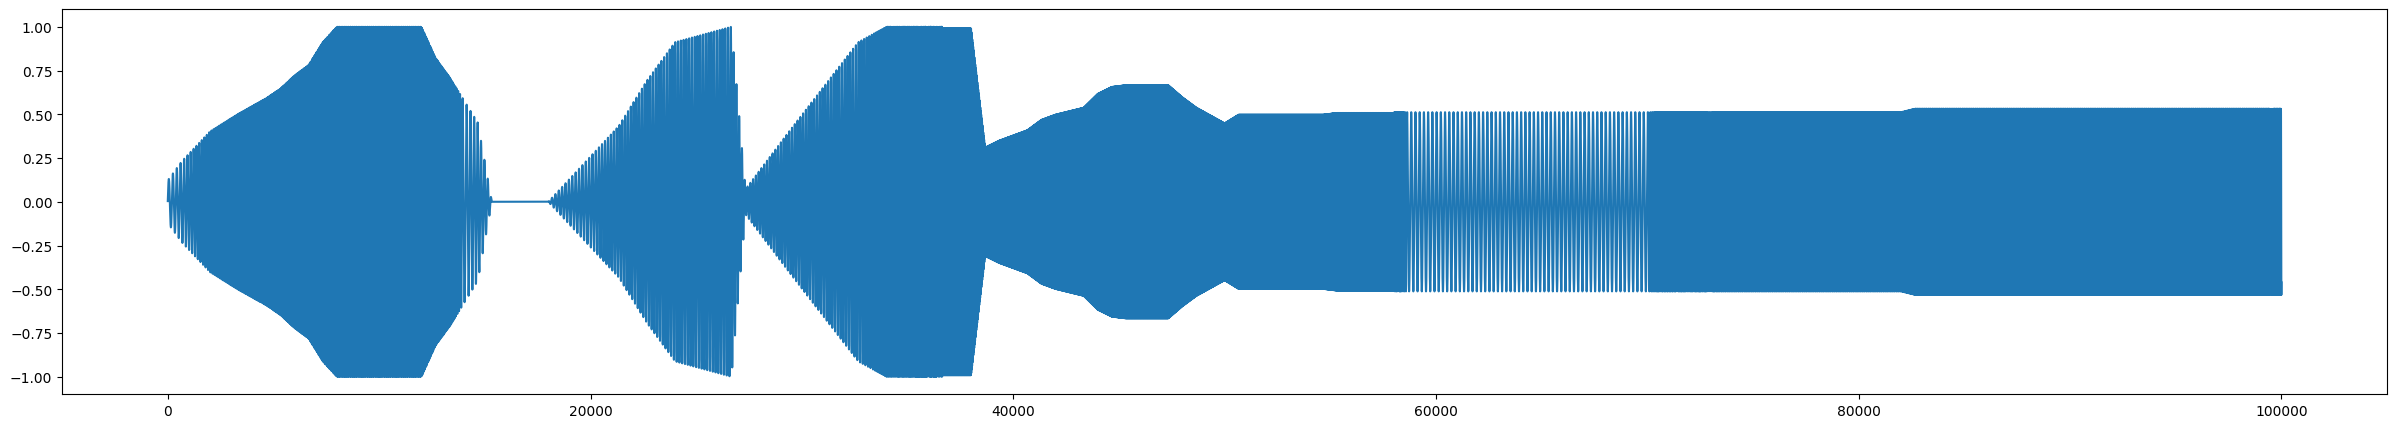

In [42]:
plt.figure(figsize=(30, 5))  
plt.plot(vib_signal_result)
plt.show()